In [124]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

In [125]:
# Reading the dataset
file = pd.read_csv(r"C:\Users\SunByte\Desktop\desktab\ML\ML codes\Polynomial_regresion\data\Fish.csv")

In [126]:
# Checking the dataset header
print(file.head())

  Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340


In [127]:
# Normalizing numeric columns

# Select numeric columns only (exclude 'Species')
numeric_cols = file.select_dtypes(include=['float64', 'int64']).columns

# Initialize scaler
# scaler = MinMaxScaler()

# Fit and transform
file[numeric_cols] = MinMaxScaler().fit_transform(file[numeric_cols])

# Checking dataset header
print(file.head())

  Species    Weight   Length1   Length2   Length3    Height     Width
0   Bream  0.146667  0.304854  0.309091  0.358108  0.568334  0.418978
1   Bream  0.175758  0.320388  0.325455  0.378378  0.624055  0.459235
2   Bream  0.206061  0.318447  0.329091  0.376689  0.618123  0.514279
3   Bream  0.220000  0.365049  0.374545  0.417230  0.638566  0.480365
4   Bream  0.260606  0.368932  0.374545  0.425676  0.621966  0.576004


In [128]:
# Normalizing Labeled columns

# Initialize encoder
encoder = LabelEncoder()
print(encoder)
# Encode 'Species' column
file['Species'] = encoder.fit_transform(file['Species'])

# Checking dataset header
print(file.head())
# print("Label mapping:", dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))

LabelEncoder()
   Species    Weight   Length1   Length2   Length3    Height     Width
0        0  0.146667  0.304854  0.309091  0.358108  0.568334  0.418978
1        0  0.175758  0.320388  0.325455  0.378378  0.624055  0.459235
2        0  0.206061  0.318447  0.329091  0.376689  0.618123  0.514279
3        0  0.220000  0.365049  0.374545  0.417230  0.638566  0.480365
4        0  0.260606  0.368932  0.374545  0.425676  0.621966  0.576004


In [129]:
# Features (X) = all columns except Weight
# Target (y) = Weight
X = file.drop(columns=['Weight'])
Y = file['Weight']

# Split data into 80% train, 20% test, random_state = seed to find extract data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# print(X_train)
# print(X_test.shape)
# print(y_train)
# print(y_test.shape)


In [130]:
# Store results
degrees = range(1, 9)  # Polynomial degrees 1 → 9
                       # Can be changed
train_mse_list = []
test_mse_list = []

best_test_mse = float('inf')
best_degree = 1
best_model = None
best_poly = None

In [131]:
# Loop through each degree
for d in degrees:
    poly = PolynomialFeatures(degree=d, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    ridge = Ridge(alpha=1.0)
    ridge.fit(X_train_poly, y_train)

    y_train_pred = ridge.predict(X_train_poly)
    y_test_pred = ridge.predict(X_test_poly)

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    train_mse_list.append(train_mse)
    test_mse_list.append(test_mse)

    print(f"Degree {d}: Train MSE = {train_mse:.4f}, Test MSE = {test_mse:.4f}")

    # Keep best model
    if test_mse < best_test_mse:
        best_test_mse = test_mse
        best_degree = d
        best_model = ridge
        best_poly = poly

print(f"\nBest degree based on Test MSE: {best_degree}")


Degree 1: Train MSE = 0.0054, Test MSE = 0.0057
Degree 2: Train MSE = 0.0012, Test MSE = 0.0013
Degree 3: Train MSE = 0.0008, Test MSE = 0.0012
Degree 4: Train MSE = 0.0007, Test MSE = 0.0009
Degree 5: Train MSE = 0.0005, Test MSE = 0.0009
Degree 6: Train MSE = 0.0005, Test MSE = 0.0020
Degree 7: Train MSE = 0.0004, Test MSE = 0.0083
Degree 8: Train MSE = 0.0004, Test MSE = 0.0034

Best degree based on Test MSE: 4


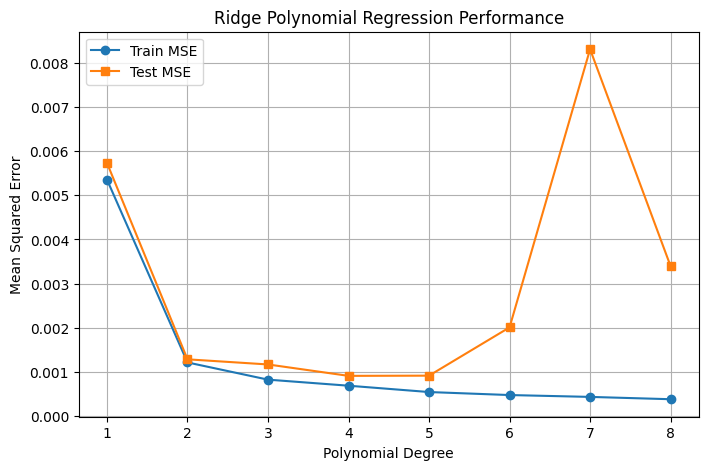

In [132]:
# Plotting MSE of train and test data to see overfitting/high-variance and underfitting/high-bias
plt.figure(figsize=(8, 5))
plt.plot(degrees, train_mse_list, marker='o', label='Train MSE')
plt.plot(degrees, test_mse_list, marker='s', label='Test MSE')
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.title("Ridge Polynomial Regression Performance")
plt.legend()
plt.grid(True)
plt.show()

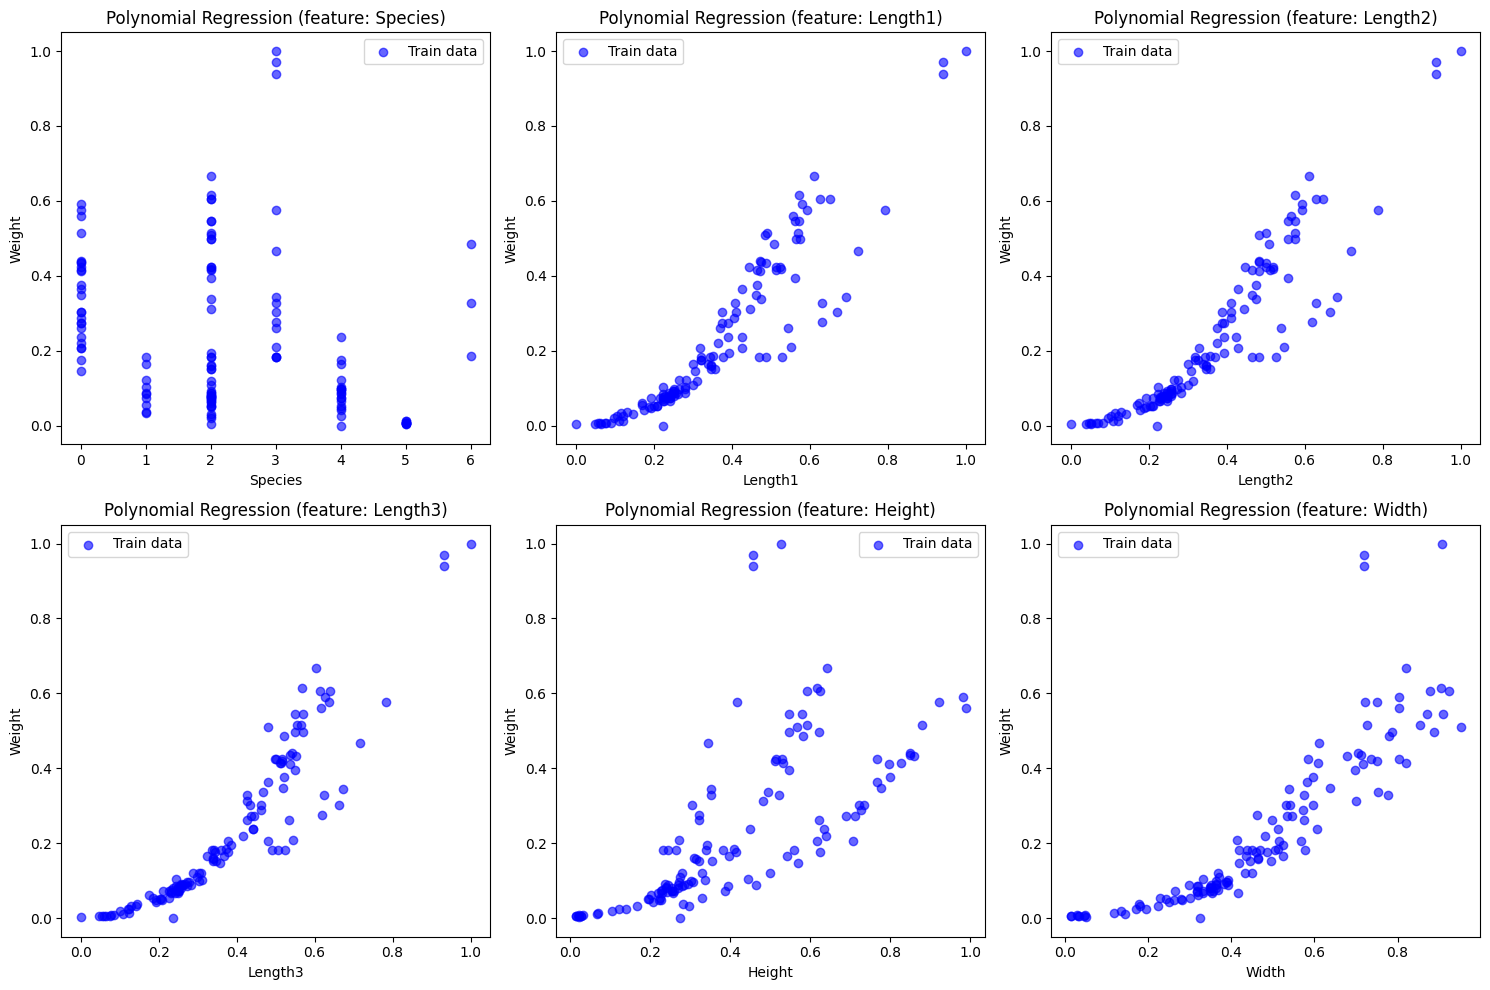

In [133]:
# Scatter train data
feature_names = X.columns[:6]  # select first 6 features (or all if you want)

plt.figure(figsize=(15, 10))

for i, feature in enumerate(feature_names, 1):
    plt.subplot(2, 3, i)

    # Scatter + prediction line
    plt.scatter(X_train[feature], y_train, color='blue', alpha=0.6, label='Train data')
    # plt.plot(X_line[feature], y_line_pred, color='red', linewidth=2, label='Polynomial fit')

    plt.xlabel(feature)
    plt.ylabel("Weight")
    plt.title(f"Polynomial Regression (feature: {feature})")
    plt.legend()

plt.tight_layout()
plt.show()

C:\Users\SunByte\AppData\Local\Temp\ipykernel_12336\2159421374.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2.2440944881889764' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_line[:] = X_train.mean()
C:\Users\SunByte\AppData\Local\Temp\ipykernel_12336\2159421374.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2.2440944881889764' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_line[:] = X_train.mean()
C:\Users\SunByte\AppData\Local\Temp\ipykernel_12336\2159421374.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2.2440944881889764' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_line[:] = X_train.mean()
C:\Users\SunByte\AppData\Loc

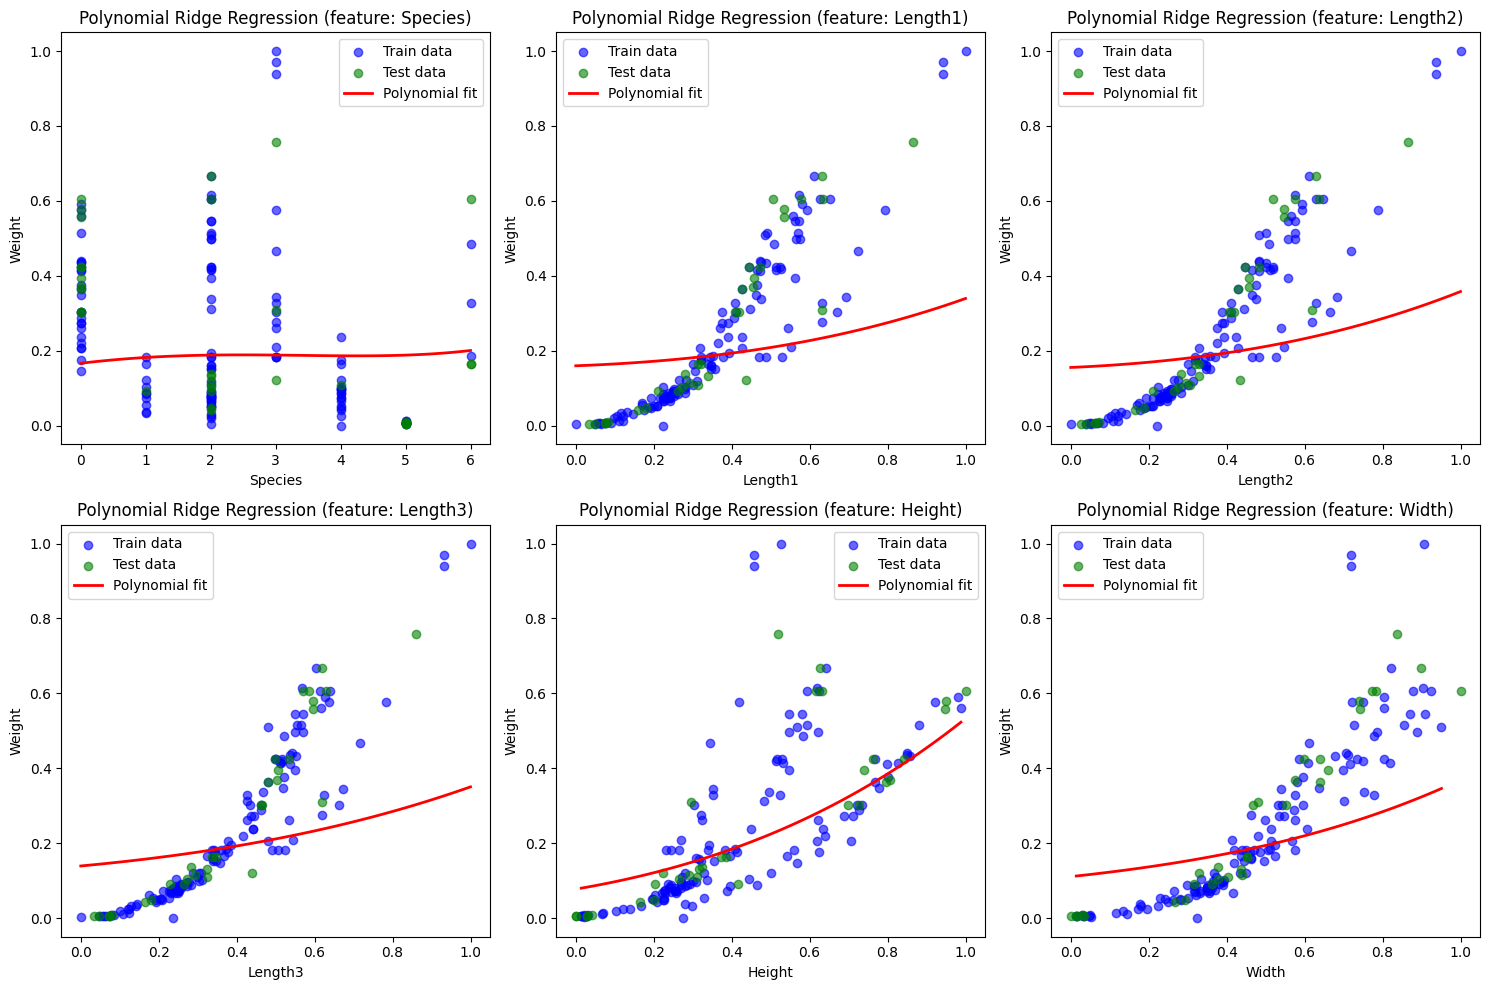

In [134]:
# Scatter train/test data and plotting the polynomial on data
#  Blue points → train data
# Green points → test data
#   Red line   → fitted plot (The past tense of "fit" is fit or fitted) :)
feature_names = X.columns[:6]  # first 6 features

plt.figure(figsize=(15, 10))

for i, feature in enumerate(feature_names, 1):
    plt.subplot(2, 3, i)

    # Generate smooth line keeping other features at mean
    X_line = X_train.copy()
    X_line[:] = X_train.mean()
    X_line[feature] = np.linspace(X_train[feature].min(), X_train[feature].max(), 127)
    X_line_poly = best_poly.transform(X_line)
    y_line_pred = best_model.predict(X_line_poly)

    # Scatter plot + prediction line
    plt.scatter(X_train[feature], y_train, color='blue', alpha=0.6, label='Train data')
    plt.scatter(X_test[feature], y_test, color='green', alpha=0.6, label='Test data')
    plt.plot(X_line[feature], y_line_pred, color='red', linewidth=2, label='Polynomial fit')

    plt.xlabel(feature)
    plt.ylabel("Weight")
    plt.title(f"Polynomial Ridge Regression (feature: {feature})")
    plt.legend()

plt.tight_layout()
plt.show()

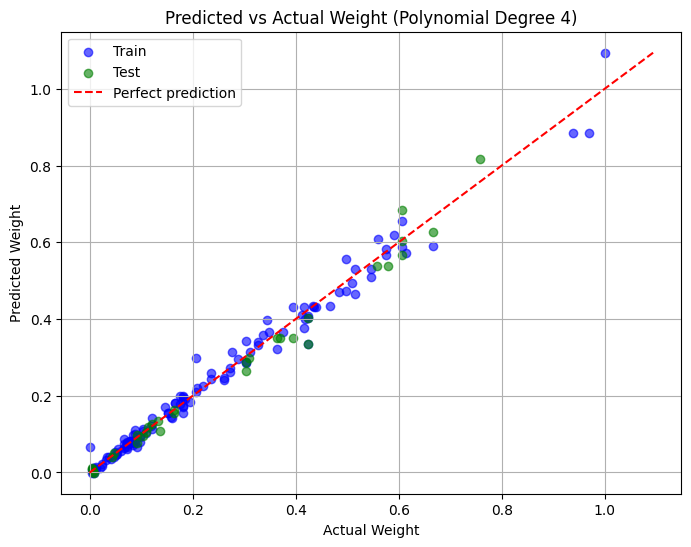

In [135]:
# Predictions for best model
y_train_pred = best_model.predict(best_poly.transform(X_train))
y_test_pred = best_model.predict(best_poly.transform(X_test))

plt.figure(figsize=(8, 6))

# Scatter for train and test
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.6, label='Train')
plt.scatter(y_test, y_test_pred, color='green', alpha=0.6, label='Test')

# Perfect prediction line
max_val = max(y.max(), y_train_pred.max(), y_test_pred.max())
min_val = min(y.min(), y_train_pred.min(), y_test_pred.min())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect prediction')

plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")
plt.title(f"Predicted vs Actual Weight (Polynomial Degree {best_degree})")
plt.legend()
plt.grid(True)
plt.show()